In [9]:
%%time
from syntheticDBN2 import Bayes_Test
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import pyAgrum.lib.dynamicBN as gdyn
import pyAgrum.skbn as skbn
%matplotlib widget

Wall time: 510 µs


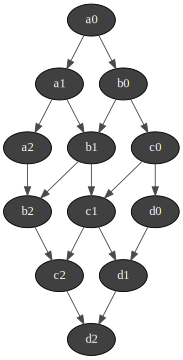

In [11]:
timesteps = 3
nodes = 4
values = 2

# Initialize true_dbn
twodbn = gum.BayesNet()
# Create nodes
all_nodes = []
all_names = []

names = [f"{chr(ord('`')+(x%26 + 1))}"*(np.ceil((x+1)/26).astype(int)) for x in range(nodes)]
# print(names)
for t in ['0','t']:
    for i in range(nodes):
        name = names[i]+t
        all_names.append(name)
        all_nodes.append(twodbn.add(gum.LabelizedVariable(name,name,values)))

#OC Stands for one causal structure!!!

arcs = [arc for arc in list(itertools.combinations(all_nodes,2)) if arc[1] % nodes != 0 and arc[1] - arc[0] < 2]

for node in range(nodes):
    arcs.append((node, node+nodes))

twodbn.addArcs(arcs)

twodbn.generateCPTs()

true_dbn=gdyn.unroll2TBN(twodbn,timesteps)
gnb.show(true_dbn)

In [15]:
train_data,_=gum.generateSample(true_dbn,10000,None,False)
train_data = train_data.reindex(sorted(train_data.columns, key=lambda x: (len(x), x[::-1], x[-1])), axis=1)
train_data

,a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,c2,d2
0,0,1,0,0,1,1,1,1,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0,1,0
2,1,1,0,1,0,1,0,1,0,1,0,1
3,1,0,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0,1,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,1,0,0,0,0,0,0,0,0,0,1
9996,0,1,0,0,0,1,0,1,1,1,0,1
9997,0,0,0,0,1,1,1,0,0,0,1,1
9998,0,0,1,1,0,0,0,1,1,0,1,1
